In [3]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pylab
from scipy import stats

sns.set()

In [4]:
# Load dataset
orders = pd.read_csv('orders.csv').drop(['Unnamed: 0'],axis=1)
orders.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description,CancelledOrder,InternationalOrders,TotalPrice
0,536365,85123A,6,2010-12-01 8:26,2.55,C17850,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,0,0,15.30
1,536365,71053,6,2010-12-01 8:26,3.39,C17850,United Kingdom,WHITE METAL LANTERN,0,0,20.34
2,536365,84406B,8,2010-12-01 8:26,2.75,C17850,United Kingdom,CREAM CUPID HEARTS COAT HANGER,0,0,22.00
3,536365,84029G,6,2010-12-01 8:26,3.39,C17850,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,0,0,20.34
4,536365,84029E,6,2010-12-01 8:26,3.39,C17850,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,0,0,20.34


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404618 entries, 0 to 404617
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   InvoiceNo            404618 non-null  object 
 1   StockCode            404618 non-null  object 
 2   Quantity             404618 non-null  int64  
 3   InvoiceDate          404618 non-null  object 
 4   UnitPrice            404618 non-null  float64
 5   CustomerID           404618 non-null  object 
 6   Country              404618 non-null  object 
 7   Description          404618 non-null  object 
 8   CancelledOrder       404618 non-null  int64  
 9   InternationalOrders  404618 non-null  int64  
 10  TotalPrice           404618 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 34.0+ MB


In [6]:
# Convert InvoiceDate to datetime object
orders.InvoiceDate = pd.to_datetime(orders.InvoiceDate)

# Truncate the minutes part of datetime object
orders['InvoiceDate'] = orders.InvoiceDate.dt.date

In [7]:
# Confirm all cancelled orders have negative TotalPrice and Quantity

print(orders[(orders.InvoiceNo.str.startswith('C')) & (orders.TotalPrice>0)])
print(orders[(orders.InvoiceNo.str.startswith('C')) & (orders.Quantity>0)])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Description, CancelledOrder, InternationalOrders, TotalPrice]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Description, CancelledOrder, InternationalOrders, TotalPrice]
Index: []


In [8]:
orders.drop(['InvoiceNo', 'CustomerID','Country','InternationalOrders','Description','CancelledOrder','UnitPrice'],
            axis=1,inplace=True)

### Feature Engineering

In [9]:
orders.head()

,StockCode,Quantity,InvoiceDate,TotalPrice
0,85123A,6,2010-12-01,15.30
1,71053,6,2010-12-01,20.34
2,84406B,8,2010-12-01,22.00
3,84029G,6,2010-12-01,20.34
4,84029E,6,2010-12-01,20.34


In [10]:
# holidays = ['2010-12-27', '2010-12-28', '2011-01-03', '2011-04-22', '2011-04-25', '2011-04-29', '2011-05-02',
#             '2011-05-30', '2011-08-29']
# temp = pd.DataFrame({'InvoiceDate':holidays})
# temp['StockCode'] = 0
# temp['Quantity'] = 0
# temp['TotalPrice'] = 0
# orders.append(temp,ignore_index=True,sort=False)

In [11]:
orders = orders.groupby(['InvoiceDate','StockCode'],as_index=False).sum()
orders.InvoiceDate = pd.to_datetime(orders.InvoiceDate)

In [12]:
orders['Year'] = orders.InvoiceDate.dt.year
orders['Quarter'] = orders.InvoiceDate.dt.quarter
orders['Month'] = orders.InvoiceDate.dt.month
orders['Week'] = orders.InvoiceDate.dt.week
orders['Weekday'] = orders.InvoiceDate.dt.weekday
orders['Day'] = orders.InvoiceDate.dt.day
orders['Dayofyear'] = orders.InvoiceDate.dt.dayofyear
orders['UnitPrice'] = orders.TotalPrice/orders.Quantity

<ipython-input-12-e719981d5dce>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  orders['Week'] = orders.InvoiceDate.dt.week


In [13]:
orders.head()

,InvoiceDate,StockCode,Quantity,TotalPrice,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,UnitPrice
0,2010-12-01,10002,60,51.00,2010,4,12,48,2,1,335,0.85
1,2010-12-01,10125,2,1.70,2010,4,12,48,2,1,335,0.85
2,2010-12-01,10133,5,4.25,2010,4,12,48,2,1,335,0.85
3,2010-12-01,15044B,1,2.95,2010,4,12,48,2,1,335,2.95
4,2010-12-01,15056BL,20,113.00,2010,4,12,48,2,1,335,5.65


In [14]:
orders.describe()

,Quantity,TotalPrice,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,UnitPrice
count,224628.000000,224628.000000,224628.000000,224628.000000,224628.000000,224628.000000,224628.000000,224628.000000,224628.000000,2.240890e+05
mean,21.755712,36.874346,2010.936713,2.739730,7.253993,29.413662,2.617821,15.114460,204.576740,NaN
std,65.986694,136.945165,0.243479,1.130302,3.448225,14.901138,1.931312,8.647994,104.412414,NaN
min,-8974.000000,-3825.360000,2010.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,-inf
25%,3.000000,6.250000,2011.000000,2.000000,4.000000,16.000000,1.000000,7.000000,111.000000,8.500000e-01
50%,8.000000,15.300000,2011.000000,3.000000,8.000000,32.000000,2.000000,15.000000,220.000000,1.663433e+00
75%,24.000000,33.000000,2011.000000,4.000000,10.000000,43.000000,4.000000,22.000000,299.000000,3.750000e+00
max,4848.000000,39619.500000,2011.000000,4.000000,12.000000,51.000000,6.000000,31.000000,357.000000,inf


In [15]:
# Drop rows with negative Quantity

orders = orders.drop(orders[orders.Quantity<=0].index).reset_index(drop=True)
orders = orders.drop(orders[orders.TotalPrice<=0].index).reset_index(drop=True)

# Removing outliers in Quantity and TotalPrice
orders = orders[(np.abs(stats.zscore(orders.Quantity)) < 3)]
orders = orders[(np.abs(stats.zscore(orders.TotalPrice)) < 3)]

In [16]:
orders.describe()

,Quantity,TotalPrice,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,UnitPrice
count,216753.000000,216753.000000,216753.000000,216753.000000,216753.000000,216753.000000,216753.000000,216753.000000,216753.000000,216753.000000
mean,17.320586,29.372231,2010.937057,2.738772,7.251461,29.402726,2.630510,15.127034,204.512533,2.885342
std,25.659530,42.252063,0.242860,1.130421,3.447829,14.900267,1.942232,8.651776,104.410938,4.465393
min,1.000000,0.060000,2010.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,0.040000
25%,3.000000,6.640000,2011.000000,2.000000,4.000000,16.000000,1.000000,7.000000,111.000000,0.850000
50%,8.000000,15.300000,2011.000000,3.000000,8.000000,32.000000,2.000000,15.000000,220.000000,1.650000
75%,23.000000,31.600000,2011.000000,4.000000,10.000000,43.000000,4.000000,22.000000,299.000000,3.750000
max,211.000000,343.050000,2011.000000,4.000000,12.000000,51.000000,6.000000,31.000000,357.000000,295.000000


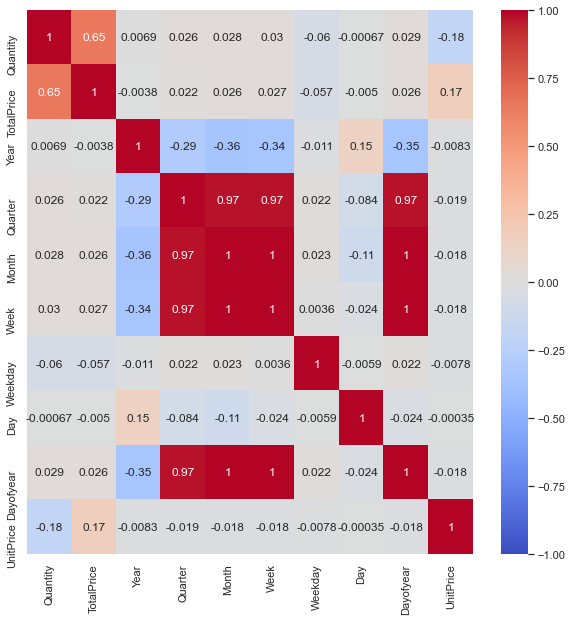

In [17]:
# Get correlations of each features in dataset
corrmat = orders.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
# Plot heat map
g=sns.heatmap(orders[top_corr_features].corr(),annot=True,cmap="coolwarm",vmin=-1,vmax=1,center=0)

Above heatmap shows strong correlation between Quarter, Month, Dayofyear and Week. We will drop , Dayofyear, quarter and month, and just keep week, as week is most strongly correlated with week. Year has strong correlation with Day, and as it is not strongly correlated with Quantity, we will drop it.

In [18]:
orders.drop(['Month', 'Quarter','Dayofyear','Year'], axis=1,inplace=True)

In [19]:
orders.head()

,InvoiceDate,StockCode,Quantity,TotalPrice,Week,Weekday,Day,UnitPrice
0,2010-12-01,10002,60,51.00,48,2,1,0.85
1,2010-12-01,10125,2,1.70,48,2,1,0.85
2,2010-12-01,10133,5,4.25,48,2,1,0.85
3,2010-12-01,15044B,1,2.95,48,2,1,2.95
4,2010-12-01,15056BL,20,113.00,48,2,1,5.65


In [20]:
orders.to_csv('data.csv')